# Predicting Song Popularity Using Regression Models

## **Introduction**
Music has always been an integral part of our lives, and the advent of streaming platforms like Spotify has transformed how we listen to and discover songs. With millions of tracks available, understanding what makes a song popular has become an intriguing challenge. In this project, we aim to predict the **popularity of songs** based on their **audio features** using regression models.

---

## **Objective**
The goal of this project is to build a regression model that predicts a song's **popularity score** (e.g., Spotify Popularity Score) using its **audio features**, such as:
- year
- genre
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration
- time_signature

By analyzing these features, we aim to uncover insights into the characteristics that make a song resonate with listeners.

---

## **1. Data Collection**

**Using a Public Dataset for Song Popularity Prediction**

### **Dataset Overview**
- **Source:** [Kaggle](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks)  
  The dataset used for this project was sourced from Kaggle, specifically the "Spotify_1Million_Tracks".
  
- **Content:**  
  This dataset contains detailed information about songs released between 2000 and 2023, including:
  - **Audio Features:** Danceability, energy, valence, tempo, etc.
  - **Metadata:** Song title, artist, release date, and duration.
  - **Target Variable:** Popularity score (ranging from 0 to 100), reflecting a song's performance on Spotify.

- **Size:** Approximately 1.159.764 rows and 20 columns.

### **Advantages of Using This Dataset**
1. **Rich Features:** The dataset provides diverse audio features, enabling in-depth analysis of factors influencing song popularity.
2. **Pre-cleaned:** Public datasets often undergo basic preprocessing, saving time on data cleaning.
3. **Reproducibility:** Using a publicly available dataset ensures that the project can be replicated and extended by others.

### **Limitations of Public Data**
1. **Bias in Popularity Scores:** The popularity metric is specific to Spotify and may not represent other platforms or global trends.
2. **Time-Specific Trends:** The dataset spans several decades, so trends in music may introduce temporal bias.
3. **Missing Context:** Factors like marketing, cultural impact, or collaborations, which heavily influence popularity, are not included.

### **Ethical Considerations**
- The dataset is publicly available under Kaggle's terms, ensuring compliance with data usage rights.
- Proper attribution is given to the dataset creator to acknowledge their work.

### **How This Dataset Was Used in the Project**
1. **Feature Selection:** Audio features like danceability, energy, and valence were chosen as predictors for the regression model.
2. **Target Variable:** The Spotify popularity score was used as the dependent variable.
3. **Preprocessing:** The dataset was cleaned and scaled to ensure optimal model performance.
4. **Model Development:** Regression models were trained and evaluated using these features.


In [1]:
import pandas as pd

# Load data
df1 = pd.read_csv('data/spotify_data.csv')
df2 = pd.read_csv('data/spotify_data2.csv')

df = pd.concat([df1, df2])

## **2. Data Exploration**

Before developing regression models, it is crucial to understand the dataset through exploratory data analysis (EDA). This helps uncover patterns, relationships, and potential issues in the data.

### **2.1. Dataset Summary**
Using `df.info()` and `df.describe()`, we gained a comprehensive overview of the dataset:
- **`df.info()`**: Provided the number of entries, data types, and non-null counts for each column.
- **`df.describe()`**: Offered summary statistics (e.g., mean, standard deviation, and percentiles) for numerical features.


In [2]:
# Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 559763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  valenc

### **2.2. Correlation Analysis**

To identify relationships between features and the target variable (popularity), we used correlation analysis. A heatmap was generated to visualize these relationships.

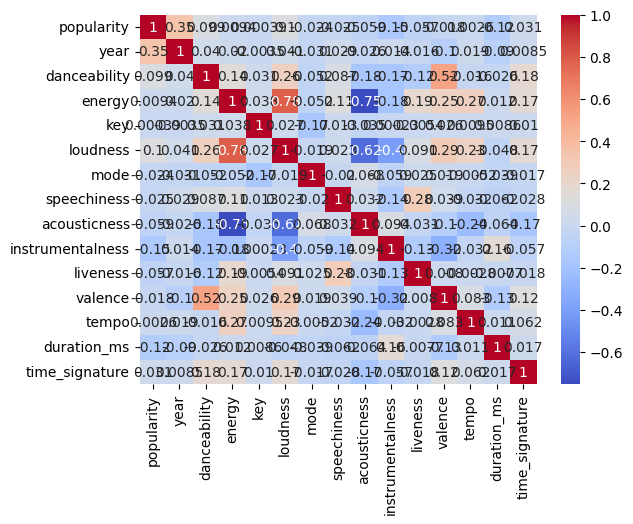

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlations
df_num = df.drop(["Unnamed: 0", "artist_name", "track_name", "track_id", "genre"], axis=1)
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Key Observations from Correlation Analysis

##### Year and Popularity
- **Correlation:** 0.35 (moderate positive)
- **Insight:** Newer songs tend to be more popular. This may reflect shifts in music trends or changes in listener preferences over time.

##### Danceability and Popularity
- **Correlation:** 0.10 (weak positive)
- **Insight:** Songs with higher danceability are slightly more likely to be popular, suggesting that danceable tracks appeal more to listeners.

##### Loudness and Popularity
- **Correlation:** 0.10 (weak positive)
- **Insight:** Louder songs might be slightly more popular, which could be due to their prominence in certain genres that emphasize sound dynamics.

##### Instrumentalness and Popularity
- **Correlation:** -0.15 (moderate negative)
- **Insight:** Instrumental tracks tend to be less popular, possibly because listeners often prefer songs with vocals.

##### Duration and Popularity
- **Correlation:** -0.12 (weak negative)
- **Insight:** Longer songs are slightly less likely to be popular, which might reflect the preference for shorter, more engaging tracks in popular music.

---

#### Other Insights

##### Energy and Loudness
- **Correlation:** 0.78 (strong positive)
- **Insight:** Louder songs tend to have higher energy levels, which is expected since loudness is often associated with energetic tracks.

##### Danceability and Valence
- **Correlation:** 0.52 (moderate positive)
- **Insight:** More danceable songs are generally more positive or happy, which aligns with the upbeat nature of dance tracks.

##### Acousticness and Energy
- **Correlation:** -0.75 (strong negative)
- **Insight:** Acoustic tracks are typically less energetic, as they often feature softer, more mellow sounds compared to energetic genres.

##### Instrumentalness and Loudness
- **Correlation:** -0.40 (moderate negative)
- **Insight:** Instrumental tracks tend to be quieter, which could be due to the absence of vocals and the nature of instrumental music production.

---

#### Implications for Modeling

- **Relevant Features for Popularity Prediction:**
  - **Year**, **Danceability**, and **Instrumentalness** show moderate relevance to popularity and may be useful as predictors in regression models.
  
- **Less Useful Features:**
  - **Key**, **Time Signature**, and **Valence** have weak correlations with popularity and may have limited predictive power.

- **Multicollinearity Considerations:**
  - Features like **Energy** and **Loudness** are strongly correlated, so their inclusion in a model should be carefully considered to avoid multicollinearity issues.


## **3. Useful Visualizations for Analyzing the Music Dataset**

### 3.1. Histogram of Popularity
- **Purpose:** To understand the distribution of the target variable, `popularity`.
- **Description:** A histogram provides a quick overview of how popular songs are in the dataset, showing the frequency of songs within different popularity ranges.
- **Key Insight:** Popularity may show a skewed distribution, with many songs falling into lower popularity brackets and fewer songs in the higher popularity range.


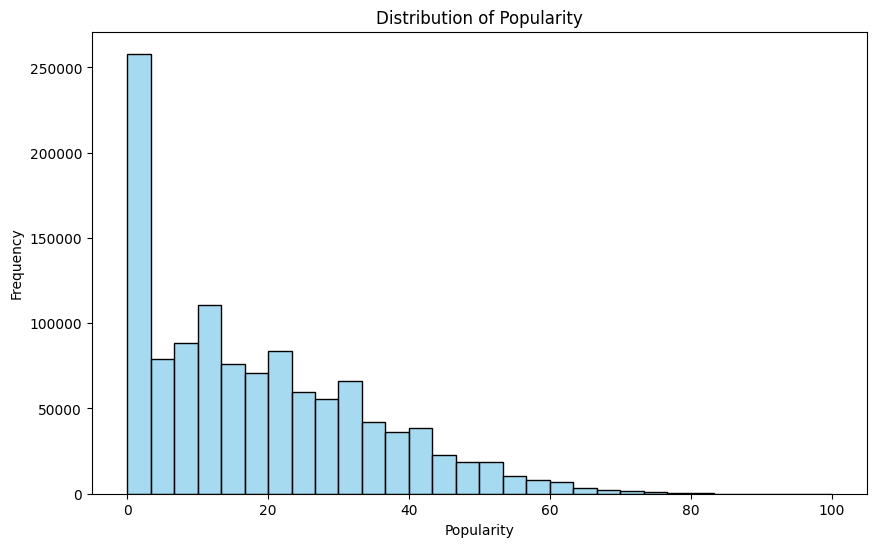

In [17]:
# Plot histogram of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

### 3.2. Popularity over years

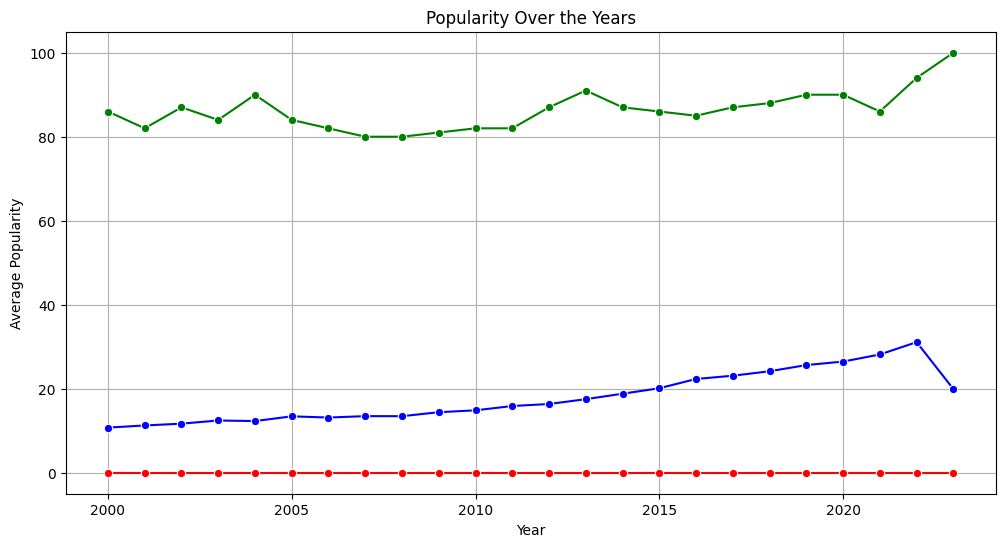

In [21]:
# Group by 'year' and calculate the mean popularity for each year
popularity_by_year = df.groupby('year')['popularity'].mean()
popularity_by_year_min = df.groupby('year')['popularity'].min()
popularity_by_year_max = df.groupby('year')['popularity'].max()

# Plotting the line diagram
plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, marker='o', color='b')
sns.lineplot(x=popularity_by_year_min.index, y=popularity_by_year_min.values, marker='o', color='r')
sns.lineplot(x=popularity_by_year_max.index, y=popularity_by_year_max.values, marker='o', color='g')
plt.title('Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

#### Boxplot

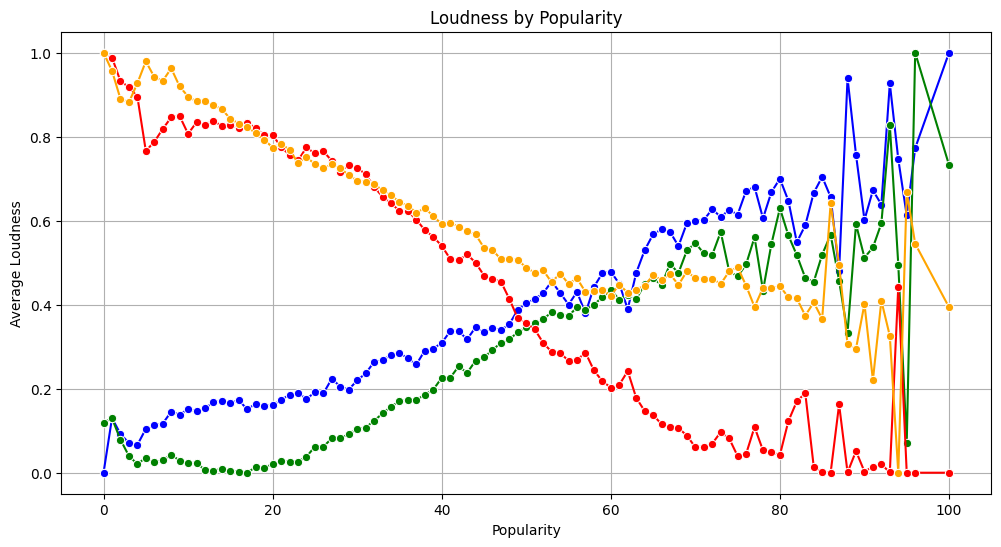

In [39]:
# Group by 'year' and calculate the mean popularity for each year
loudness_by_popularity = (loudness_by_popularity - loudness_by_popularity.min()) / (loudness_by_popularity.max() - loudness_by_popularity.min())
danceability_by_popularity = (danceability_by_popularity - danceability_by_popularity.min()) / (danceability_by_popularity.max() - danceability_by_popularity.min())
instrumentalness_by_popularity = (instrumentalness_by_popularity - instrumentalness_by_popularity.min()) / (instrumentalness_by_popularity.max() - instrumentalness_by_popularity.min())
duration_by_popularity = (duration_by_popularity - duration_by_popularity.min()) / (duration_by_popularity.max() - duration_by_popularity.min())


# Plotting the line diagram
plt.figure(figsize=(12, 6))
sns.lineplot(x=loudness_by_popularity.index, y=loudness_by_popularity.values, marker='o', color='b')
sns.lineplot(x=danceability_by_popularity.index, y=danceability_by_popularity.values, marker='o', color='g')
sns.lineplot(x=instrumentalness_by_popularity.index, y=instrumentalness_by_popularity.values, marker='o', color='r')
sns.lineplot(x=duration_by_popularity.index, y=duration_by_popularity.values, marker='o', color='orange')
plt.title('Loudness by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Loudness')
plt.grid(True)
plt.show()

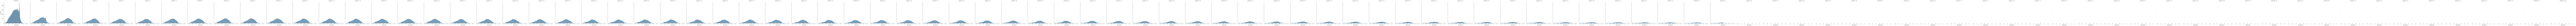

In [31]:
# Create a FacetGrid to show distributions of features by target
g = sns.FacetGrid(df, col='popularity', height=5)
g.map(sns.histplot, 'danceability', kde=True)  # Replace with other features to explore them
g.set_axis_labels('Danceability', 'Frequency')
plt.show()


### 4. **Model Development**
   - Start with a **Linear Regression** model.
   - Experiment with advanced models like **Random Forest Regression** and **Gradient Boosting**.
   - Split the dataset into training and testing subsets to evaluate model performance.


In [41]:
from sklearn.preprocessing import StandardScaler

# Features und Ziel definieren
X = df_num
y = df['popularity']

# Feature-Skalierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R²: {r2}")

RMSE: 8.278662520633956e-14, R²: 1.0


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
